<a href="https://colab.research.google.com/github/czartek7/MachineLearning/blob/master/Softmax_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


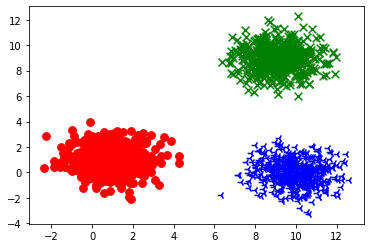

In [8]:
x1_label0 = np.random.normal(1, 1, (500, 1)) 
x2_label0 = np.random.normal(1, 1, (500, 1)) 
x1_label1 = np.random.normal(9, 1, (500, 1)) 
x2_label1 = np.random.normal(9, 1, (500, 1)) 
x1_label2 = np.random.normal(10, 1, (500, 1)) 
x2_label2 = np.random.normal(0, 1, (500, 1)) 
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60) 
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60) 
plt.scatter(x1_label2, x2_label2, c='b', marker='3', s=60) 
plt.show()

In [9]:
xs_label0 = np.hstack((x1_label0, x2_label0)) 
xs_label1 = np.hstack((x1_label1, x2_label1)) 
xs_label2 = np.hstack((x1_label2, x2_label2))

x = np.vstack((xs_label0, xs_label1, xs_label2))
print(x[2])

##labels:
##[1.,0.,0.] is red, [0.,1.,0.] is green, [0.,0.,1.] is blue
label = np.asarray([[1.,0.,0.]]*len(x1_label0)+[[0.,1.,0.]]*len(x1_label1)+[[0.,0.,1.]]*len(x1_label2))

[3.2390157 0.8598236]


In [10]:
x.shape, label.shape

((1500, 2), (1500, 3))

In [0]:
learning_rate = 1
training_epochs = 1000

X = tf.placeholder(tf.float64,shape=[None, 2])
Y = tf.placeholder(tf.float64,shape=[None, 3])

W = tf.Variable(tf.zeros([2,3],dtype=np.float64))
b = tf.Variable(tf.zeros([3],dtype=np.float64))

In [0]:
y_model = tf.matmul(X, W) + b
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_model,labels=Y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
train = optimizer.minimize(loss_function)

init = tf.global_variables_initializer()

loss = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        W_val,loss_val,_ = sess.run([W,loss_function,train],feed_dict={X: x, Y: label})
        loss.append(loss_val)

    result = sess.run(tf.nn.softmax(y_model), {X:[[10.,10.]]})

In [14]:
print(result)

[[2.04763148e-05 9.99977546e-01 1.97794804e-06]]


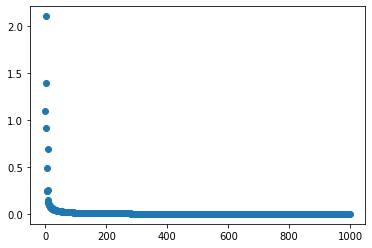

0.0022500396448006045


In [15]:
epochs = range(len(loss))
import matplotlib.pyplot as plt
plt.scatter(epochs,loss)
plt.show()
print(np.min(loss))